In [18]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import os
from scipy import signal as sp_signal
from sklearn import ensemble
import statsmodels.api as sm
warnings.filterwarnings("ignore")
dataset = pd.read_csv("Predict Future Sales_sales_train.csv")
dataset.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


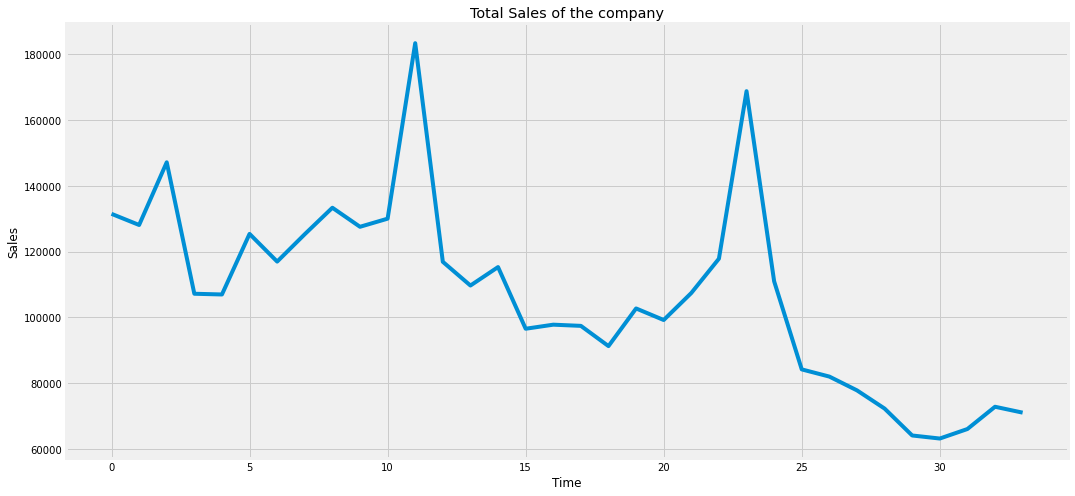

In [62]:
from datetime import date
ts=dataset.groupby(["date_block_num"],as_index = False).agg({'item_cnt_day':'sum'})
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts.item_cnt_day,label =_ORIGINAL_SIGNAL_LABEL);


In [45]:
import pandas as pd
dataTest = pd.read_csv("test.csv")
dataTest.head()
# dataTest.dtype()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [8]:
dataset_maxMonth = dataset.date_block_num.max()
dataTest['date_block_num'] = dataset_maxMonth +1
df_data = pd.concat([dataset,dataTest]).reset_index(drop =True)
 
monthly_sales = df_data.groupby(by =['date_block_num','shop_id','item_id'],as_index = False).agg({'item_price':'mean','item_cnt_day':'sum'})
monthly_sales = monthly_sales.rename(columns ={'item_cnt_day' : 'item_cnt_month'})

In [9]:
plt.style.use('fivethirtyeight')
_DATA_DIR = 'data'
_FIG_DIR = 'figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)

_SNP_500_PATH = os.path.join(_DATA_DIR, 'snp500.csv')
# _BEGINNING_DATE = date(2014, 1, 1)

_FIG_SIZE = (16, 12)
_FIG_FORMAT = 'png'
_FIG_DPI = 200
_FIG_LEGEND_LOCATION = 4

_ORIGINAL_SIGNAL_LABEL = 'Original Signal'
_MEAN_AVERAGE_SIGNAL_LABEL = 'Mean Averaged Signal'
_MEDIAN_FILTERED_SIGNAL_LABEL = 'Median Filtered Signal'
_EXPONENTIAL_SMOOTHED_AVERAGE_SIGNAL_LABEL = 'Exponential Moving Averaged Signal'
_SNP_CYCLE_SIGNAL_LABEL = 'Cycle Signal'
_SNP_TREND_SIGNAL_LABEL = 'Trend'
_BAND_PASS_FILTER_LABEL = 'Band-pas filtered'


_MEAN_AVERAGE_SIGNAL_TITLE_TEMPLATE = 'Mean Average signal with window = {}'.format
_MEDIAN_FILTER_SIGNAL_TITLE_TEMPLATE = 'Median Filtered signal with window = {}'.format
_EXPONENTIAL_SMOOTHING_TITLE_TEMPLATE = 'Exponential Smoothed signal with span = {}'.format
_HODRICK_PRESSCOTT_TITLE_TEMPLATE = 'Trend and Cycle Signal with smoothing parameter: {}'.format
_BAND_PASS_TITLE_TEMPLATE = 'Band-pass order: {}, low - high cutoff frequency: {} - {}'.format

In [10]:
def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

In [7]:
monthly_sales.head()


,date_block_num,shop_id,item_id,item_price,item_cnt_month
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,128.5,2.0


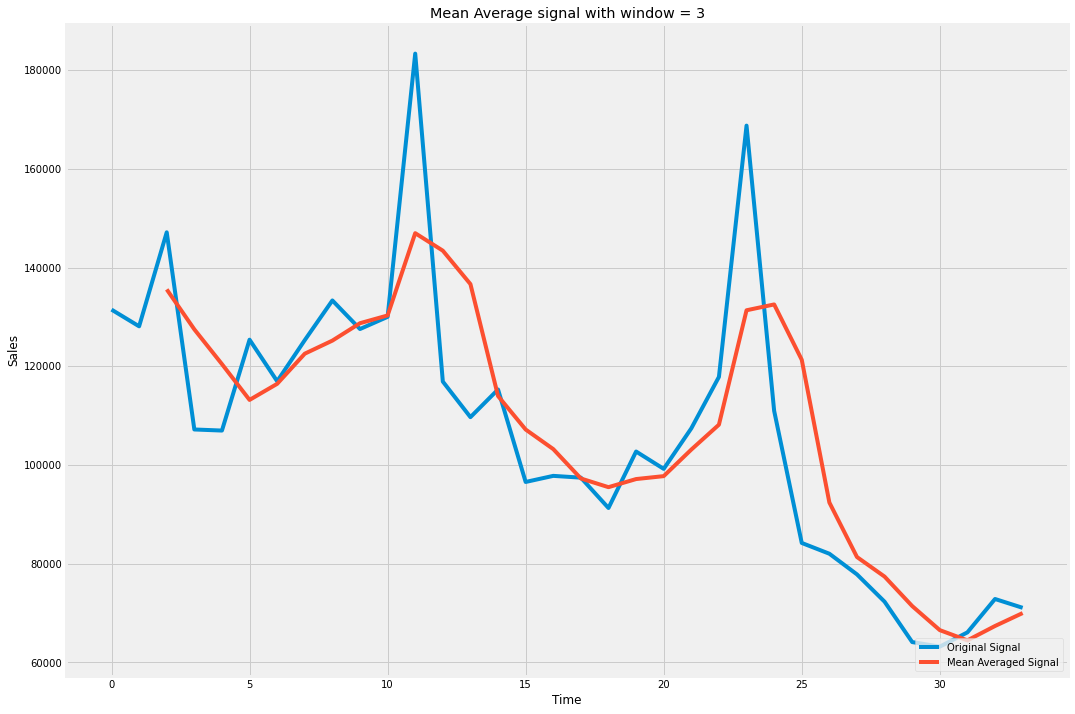

In [83]:
window = 3
title = _MEAN_AVERAGE_SIGNAL_TITLE_TEMPLATE(window)
fig_path = os.path.join(_FIG_DIR, _file_format(title))      
plt.figure(figsize=_FIG_SIZE)
# timeseries = dataset.groupby(["date_block_num"], as_index=False)["item_cnt_day"].sum()
# timeseries=timeseries.rename(columns ={'item_cnt_day' : 'numbers_item_cnt_month'})
# timeseries.astype('float')
timeseries = dataset.groupby(["date_block_num"])["item_cnt_day"].sum().rolling(window).mean()
timeseries.astype('float')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title(title)
# plt.plot(timeseries,label =_ORIGINAL_SIGNAL_LABEL)
plt.plot(ts.numbers_item_cnt_month,label=_ORIGINAL_SIGNAL_LABEL)
plt.plot(timeseries,label=_MEAN_AVERAGE_SIGNAL_LABEL);
plt.legend(loc=_FIG_LEGEND_LOCATION);

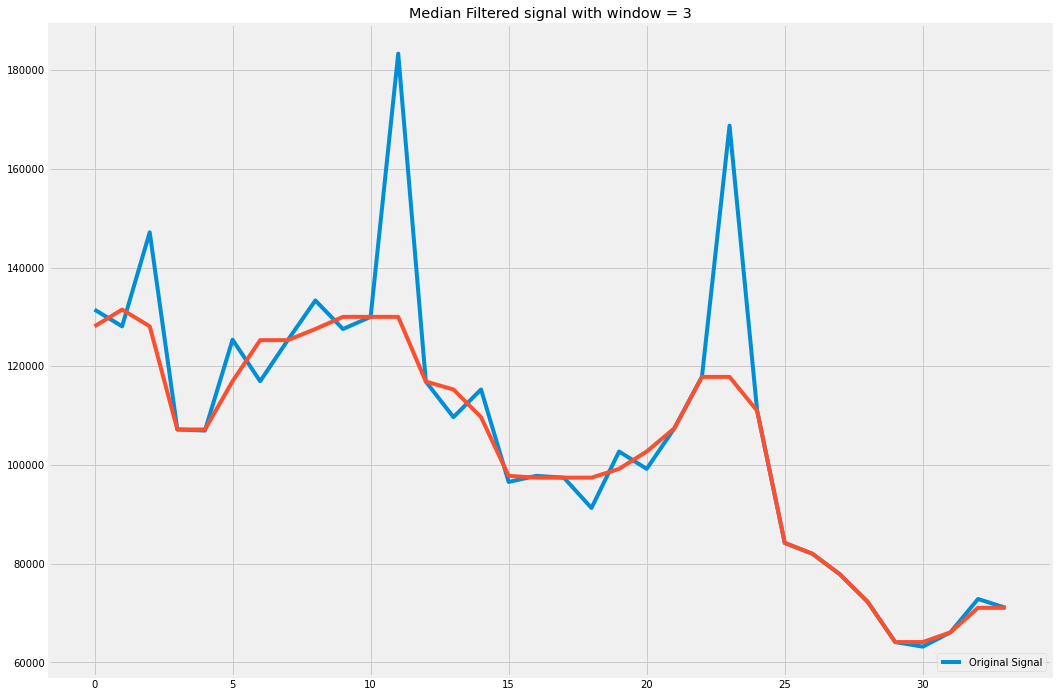

In [84]:
# Median Filter
window = 3
ts=ts.rename(columns ={'item_cnt_day' : 'numbers_item_cnt_month'})
median_filtered_signal = sp_signal.medfilt(ts.numbers_item_cnt_month, window)
title = _MEDIAN_FILTER_SIGNAL_TITLE_TEMPLATE(window)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.figure(figsize=_FIG_SIZE)
plt.plot(ts.numbers_item_cnt_month,label =_ORIGINAL_SIGNAL_LABEL)
plt.plot(ts.date_block_num,median_filtered_signal)
plt.title(title)
plt.legend(loc=_FIG_LEGEND_LOCATION);

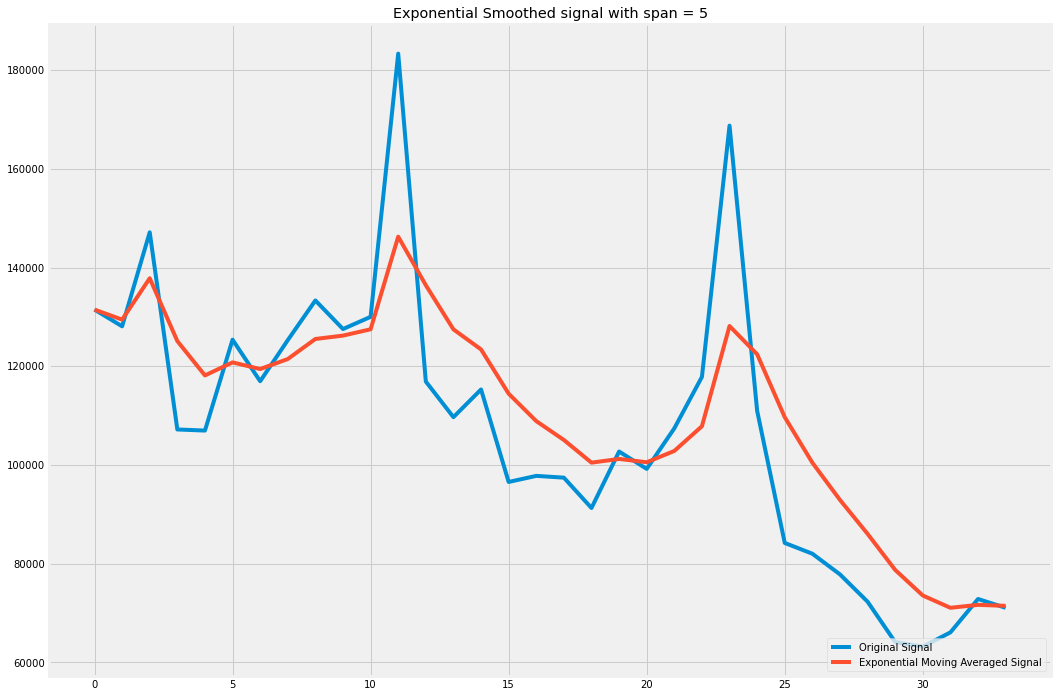

In [78]:
# Exponential Weighted Moving Average (EWMA)
span = 5
title = _EXPONENTIAL_SMOOTHING_TITLE_TEMPLATE(span)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.figure(figsize=_FIG_SIZE)
ts["_5_Period_EMA"] =ts["numbers_item_cnt_month"].ewm(span=span).mean()
plt.plot(ts.numbers_item_cnt_month,label =_ORIGINAL_SIGNAL_LABEL)
plt.plot(ts.date_block_num,ts._5_Period_EMA,label=_EXPONENTIAL_SMOOTHED_AVERAGE_SIGNAL_LABEL)
plt.title(title)
plt.legend(loc=_FIG_LEGEND_LOCATION);

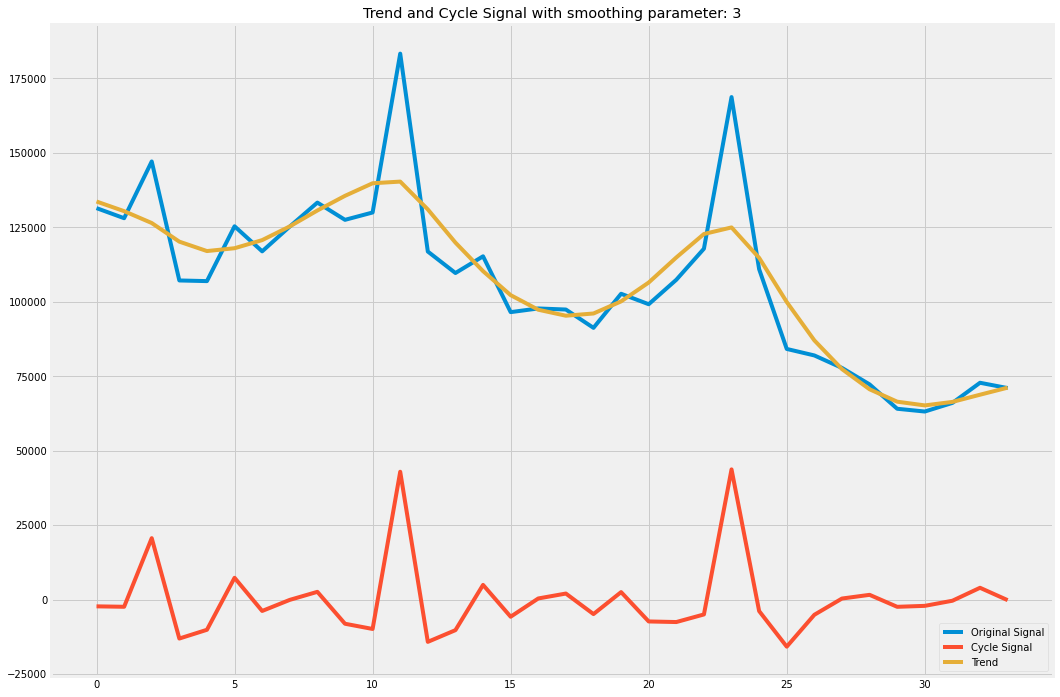

In [80]:
# Hodrick-Prescott Filter   
lamb = 3
snp_cycle, snp_trend = sm.tsa.filters.hpfilter(ts["numbers_item_cnt_month"], lamb=lamb)
title = _HODRICK_PRESSCOTT_TITLE_TEMPLATE(lamb)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.figure(figsize=_FIG_SIZE)
plt.plot(ts.numbers_item_cnt_month,label =_ORIGINAL_SIGNAL_LABEL)
plt.plot(ts.date_block_num, snp_cycle, label=_SNP_CYCLE_SIGNAL_LABEL)
plt.plot(ts.date_block_num, snp_trend, label=_SNP_TREND_SIGNAL_LABEL)
plt.title(title)
plt.legend(loc=_FIG_LEGEND_LOCATION);


In [53]:

#  l1 Trend Filtering
from sklearn.linear_model import  Lasso

In [55]:
# regularizer = 1
# _L1_TREND_SIGNAL_LABEL = '$l_1$ Trend'
# _L1_TITLE_TEMPLATE = '$l_1$ Trend Signal with regularizer: {}'.format
# title = _L1_TITLE_TEMPLATE(regularizer)
# fig_path = os.path.join(_FIG_DIR, _file_format(title))
# plt.figure(figsize=_FIG_SIZE)
# plt.plot(timeseries,label =_ORIGINAL_SIGNAL_LABEL)
# plt.plot_date(timeseries.date_block_num, Lasso(timeseries["numbers_item_cnt_month"], regularizer), label=_L1_TREND_SIGNAL_LABEL)
# plt.title(title)
# plt.legend(loc=_FIG_LEGEND_LOCATION);


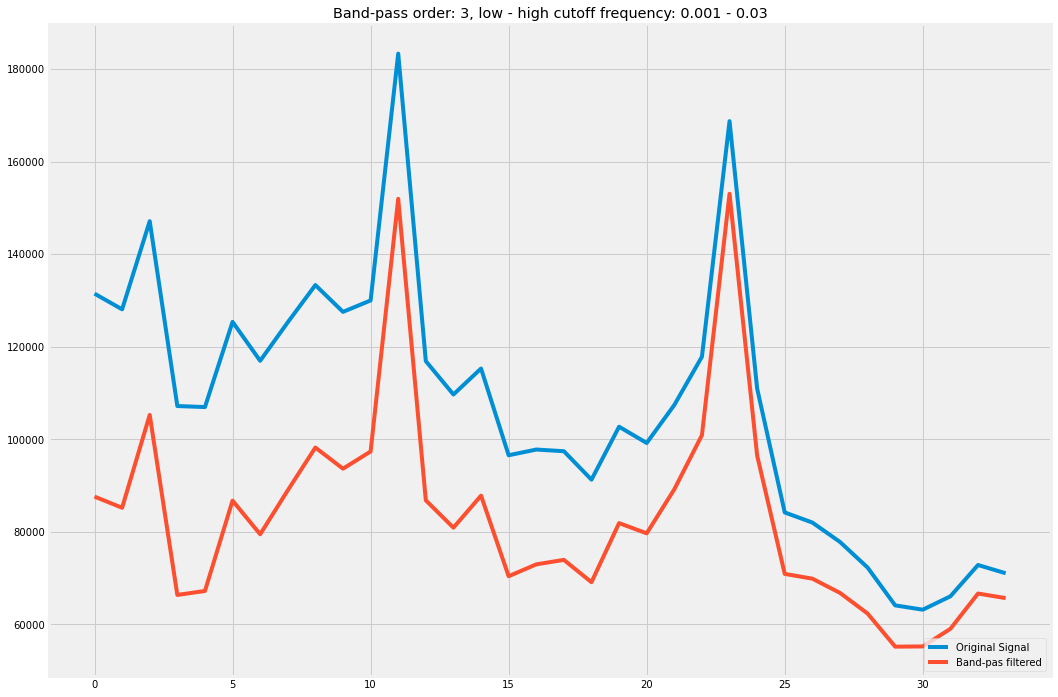

In [81]:
# Bandpass Filtering
filter_order  = 3
low_cutoff_frequency = 0.001
high_cutoff_frequency = 0.03
b, a = sp_signal.butter(filter_order, [low_cutoff_frequency, high_cutoff_frequency], btype='bandpass', output='ba')
bandpass_filtered = sp_signal.filtfilt(b, a, ts["numbers_item_cnt_month"].values)

# Plot
title = _BAND_PASS_TITLE_TEMPLATE(filter_order, low_cutoff_frequency, high_cutoff_frequency)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.figure(figsize=_FIG_SIZE)
plt.plot(ts.numbers_item_cnt_month,label =_ORIGINAL_SIGNAL_LABEL)
plt.plot(ts.date_block_num, ts.numbers_item_cnt_month-bandpass_filtered,label=_BAND_PASS_FILTER_LABEL)
plt.title(title)
plt.legend(loc=_FIG_LEGEND_LOCATION);


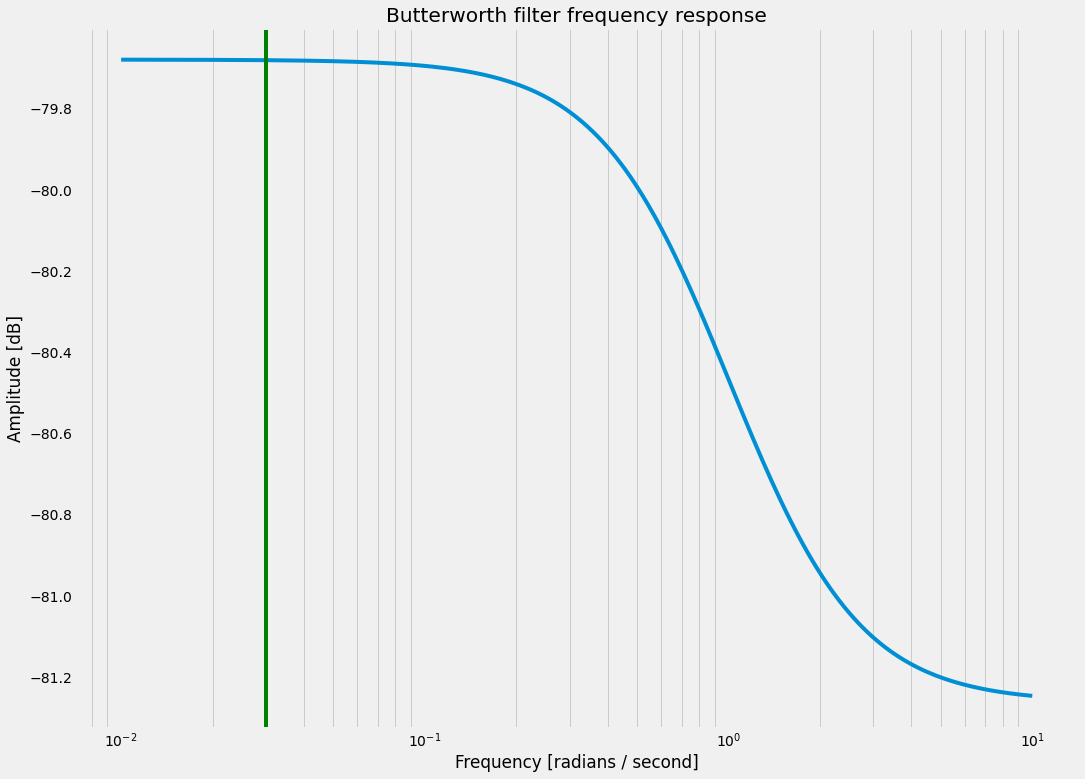

In [63]:

_BUTTERWORTH_FILTER_TITLE = 'Butterworth filter frequency response'
_BUTTERWORTH_FILTER_XLABEL = 'Frequency [radians / second]'
_BUTTERWORTH_FILTER_YLABEL = 'Amplitude [dB]'

w, h = sp_signal.freqs(b, a)
plt.figure(figsize=_FIG_SIZE)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title(_BUTTERWORTH_FILTER_TITLE)
plt.xlabel(_BUTTERWORTH_FILTER_XLABEL)
plt.ylabel(_BUTTERWORTH_FILTER_YLABEL)
#plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(0, color='green')
plt.axvline(high_cutoff_frequency, color='green');